<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import h5py
import matplotlib as mpl
%matplotlib inline

## Load Data

In [3]:
f = h5py.File("sample16.h5", mode="r")
# f = h5py.File("../", mode="r")

In [4]:
print (*f)

sample16


In [5]:
print (*f.keys())

sample16


In [6]:
f = np.array([*f["sample16"]])

In [7]:
f.shape

(16, 128, 128, 128)

In [8]:
## get the delta_HI mass 
## in the coordinates 
## x = 0/128
## y = 0/128
## z = 0/128
## of the 0th cube
f[0][0][0][0]

1.1136686

## Visualize

In [198]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """Function for dividing cmaps,
    Retrieved from: https://stackoverflow.com/questions/\
    18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib"""
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

[9.29553348e-08 5.70301313e-08 1.91314602e-08 2.94731232e-09
 6.54713989e-10]


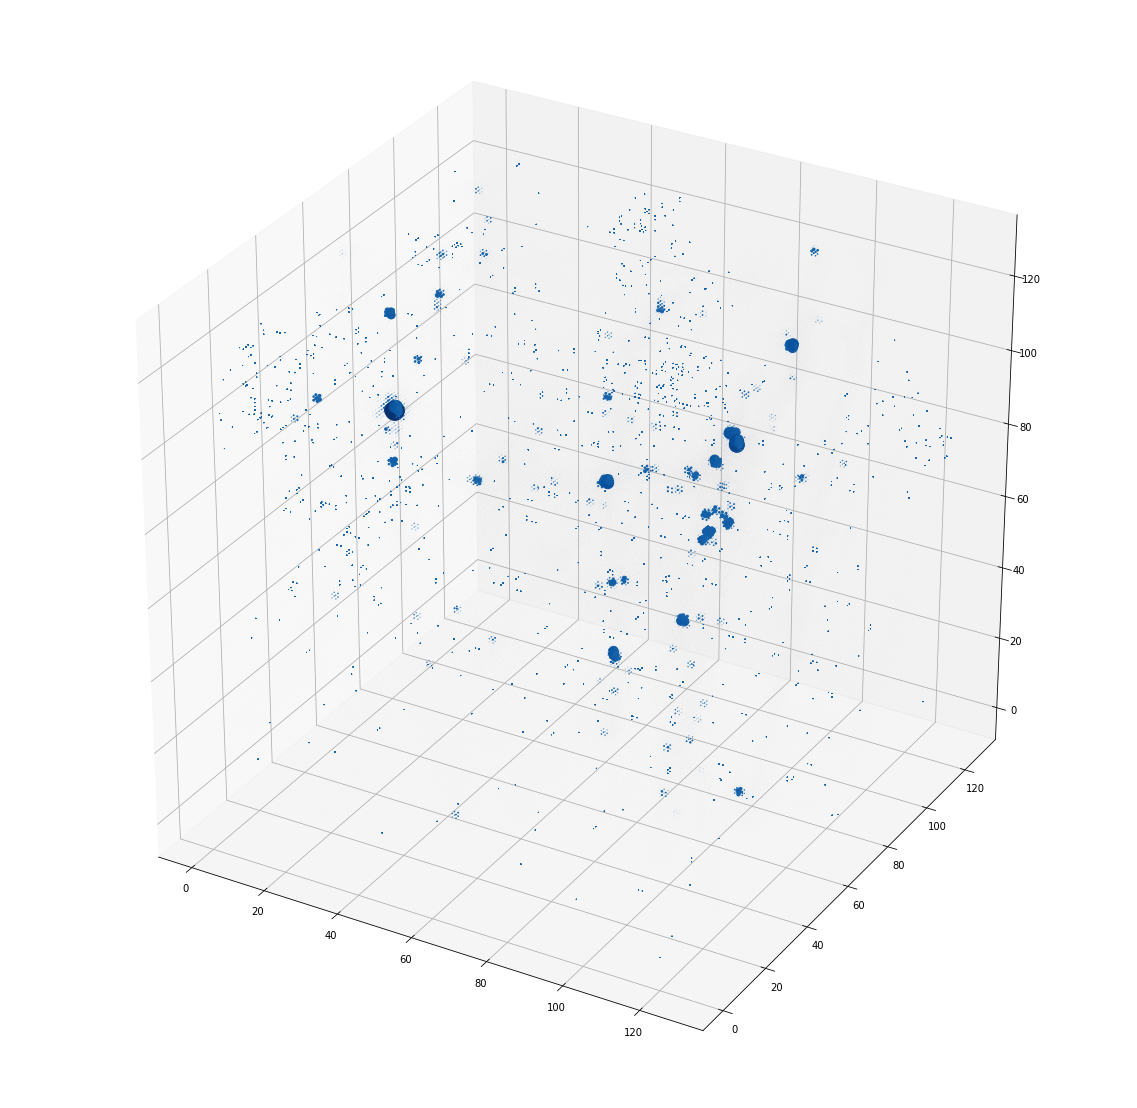

In [201]:
import itertools
cube_size = 128
random_cube_index = 0
stdev_mask = 1
edge = np.array([*range(cube_size)])

fig = plt.figure(figsize=(20,20)) 
ax = fig.add_subplot(111, projection='3d') 

start = random_cube_index
end = random_cube_index+cube_size
    
data_value = f[0][start:end,
                  start:end,
                  start:end]

x,y,z = edge,edge,edge

product = [*itertools.product(x,y,z)]

X = np.array([product[k][0] for k in [*range(len(product))]])
Y = np.array([product[k][1] for k in [*range(len(product))]])
Z = np.array([product[k][2] for k in [*range(len(product))]])

data_1dim = np.array([data_value[X[i]][Y[i]][Z[i]] for i in [*range(len(product))]])
initial_mean = np.mean(data_1dim) - 2*np.std(data_1dim)
mask = data_1dim > 0
mask = mask.astype(np.int)

data_1dim = np.multiply(mask,data_1dim)
X = X[np.where(data_1dim>0)]
Y = Y[np.where(data_1dim>0)]
Z = Z[np.where(data_1dim>0)]
data_1dim = data_1dim[np.where(data_1dim>0)]
s = 600*data_1dim/np.linalg.norm(data_1dim)

cmap=plt.get_cmap("Blues")
new_cmap = truncate_colormap(cmap, 0.96, 1,n=1000)

print (s[:5])
ax.scatter(X, Y, Z, 
           c=data_1dim, 
           cmap=new_cmap,
           s=s,alpha=1)
plt.show()

[7.96760013e-08 4.88829697e-08 1.63983944e-08 2.52626770e-09
 5.61183419e-10]


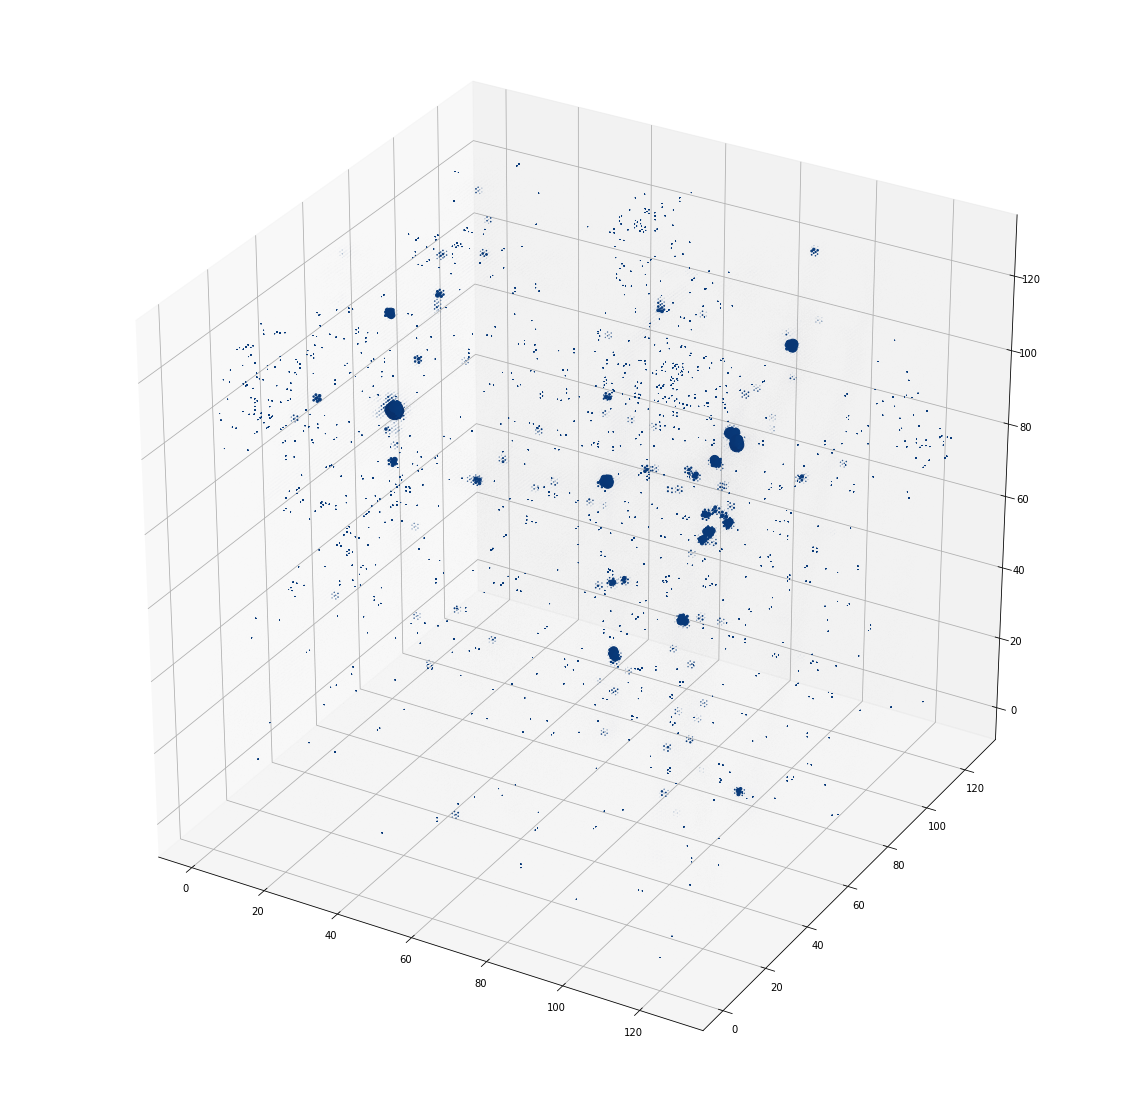

[3.55422211e-07 5.10226738e-08 5.41087767e-07 5.18262423e-07
 1.84976862e-07]


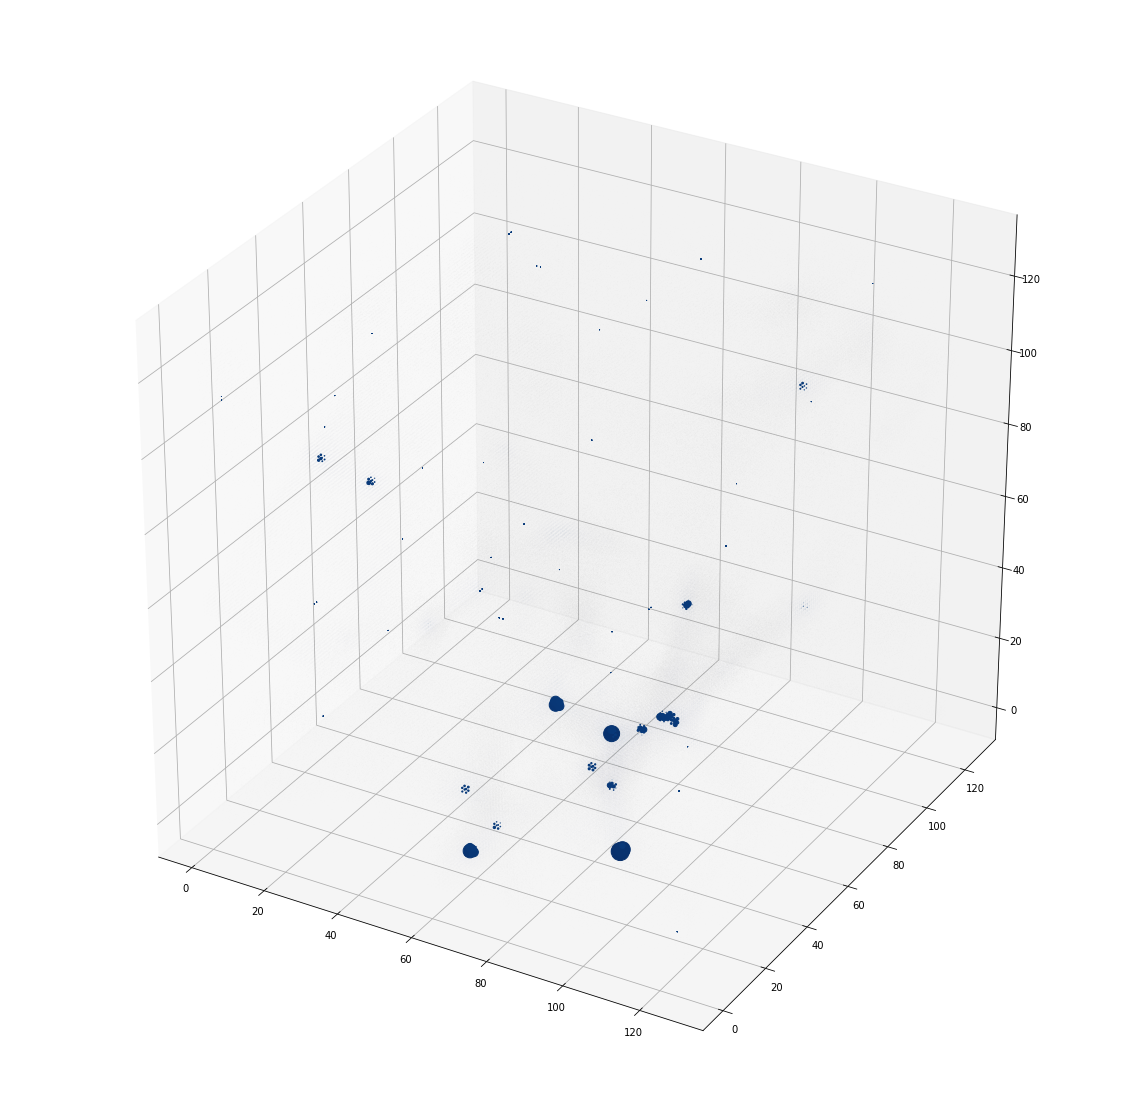

[1.11751403e-10 2.62826125e-10 3.30432898e-09 1.10431317e-09
 2.55751501e-09]


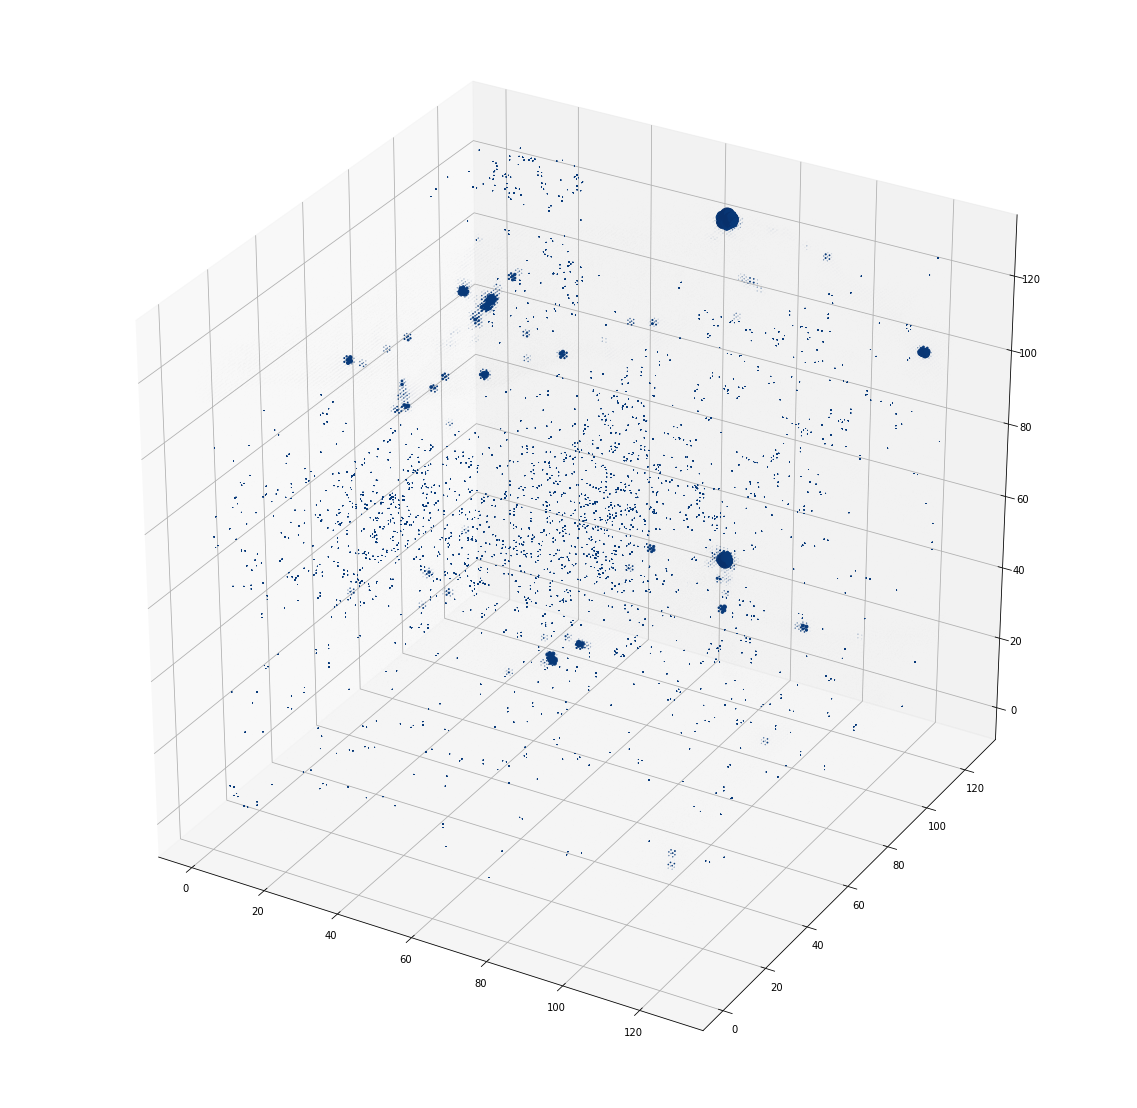

[7.17027469e-07 8.06217747e-08 4.96515716e-08 1.82641792e-07
 2.43441830e-07]


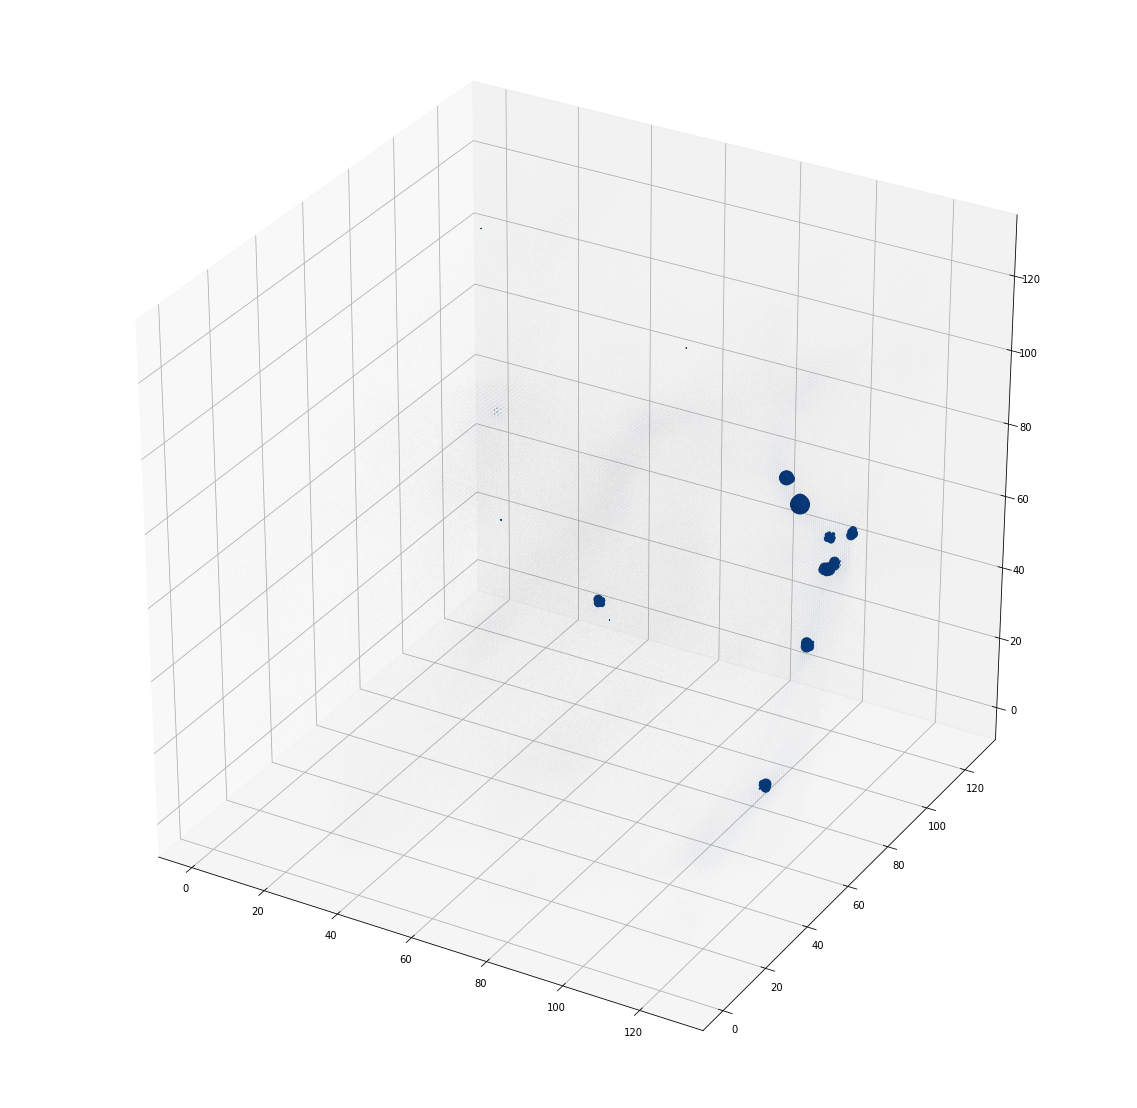

[3.49018092e-08 1.53653011e-08 1.48744936e-07 1.61945261e-08
 1.16296263e-08]


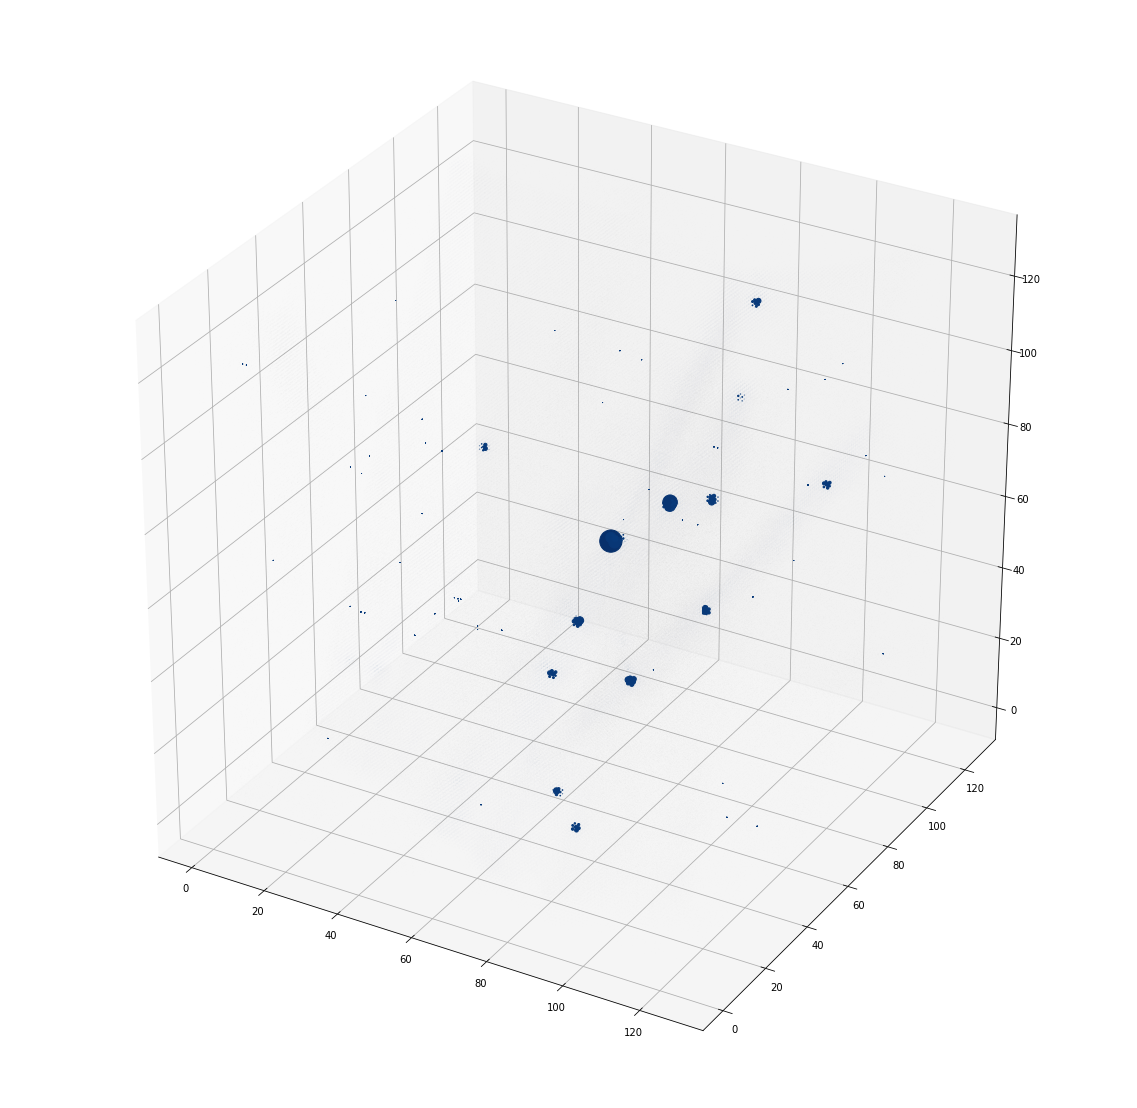

[3.77749822e-10 4.08101178e-09 7.00802743e-09 5.50490424e-09
 2.66257165e-08]


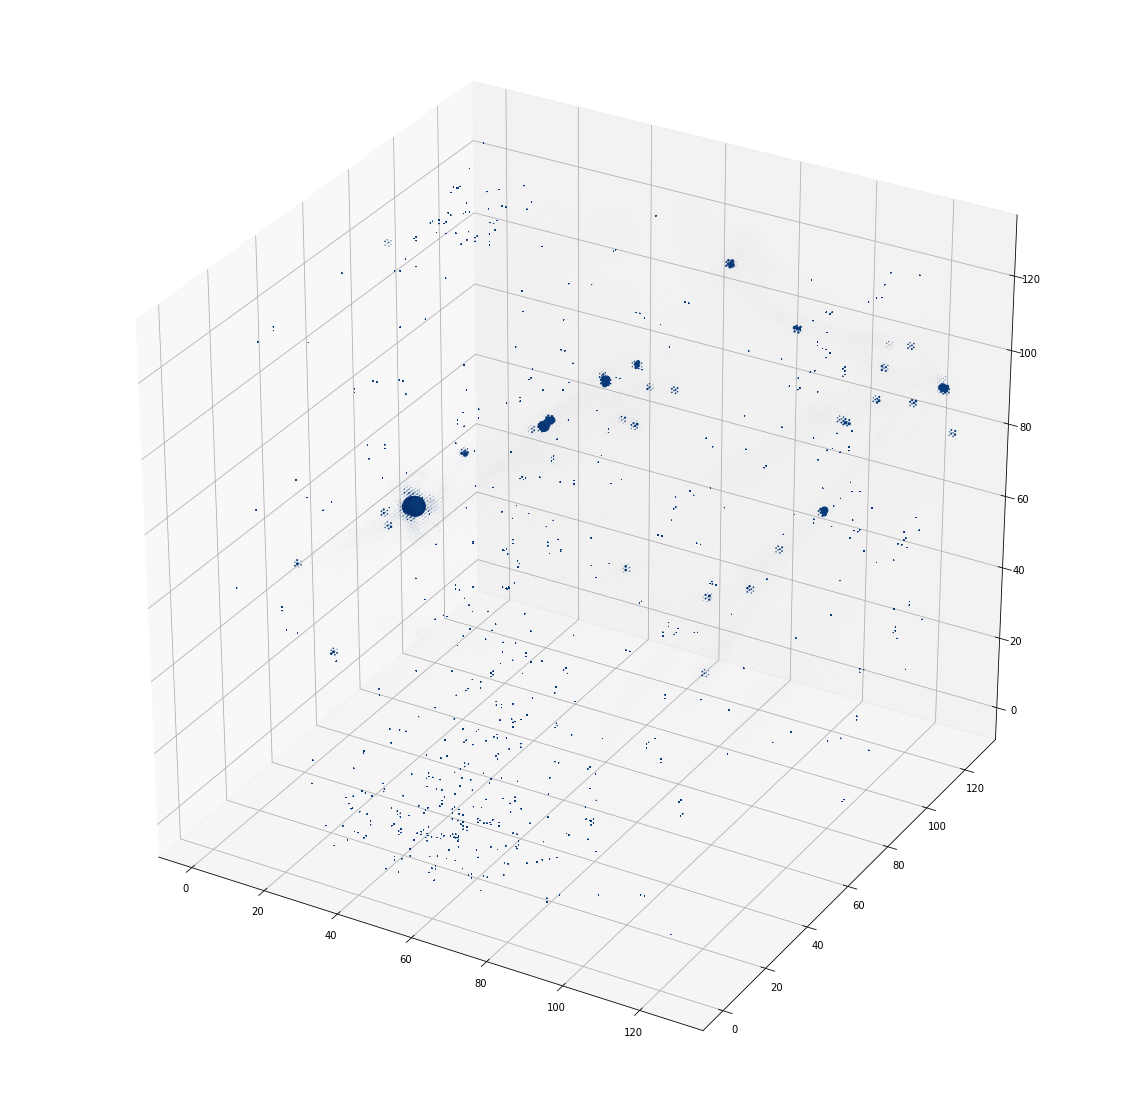

[5.87233205e-12 6.39188912e-11 1.11418262e-11 6.23741628e-11
 2.19462103e-10]


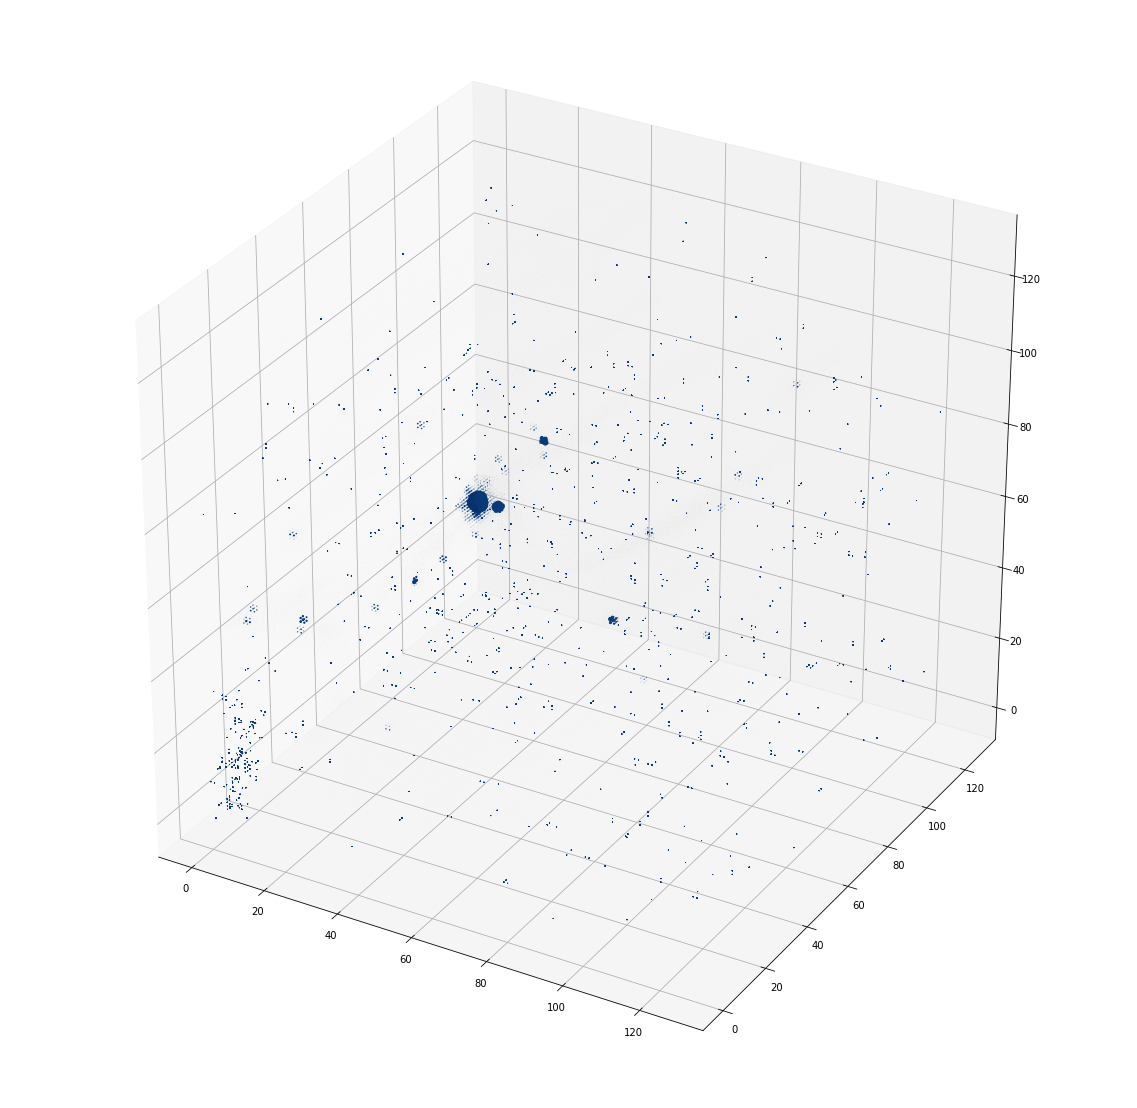

[3.16340935e-07 7.70416260e-07 2.86470447e-06 1.09547021e-05
 4.02393955e-05]


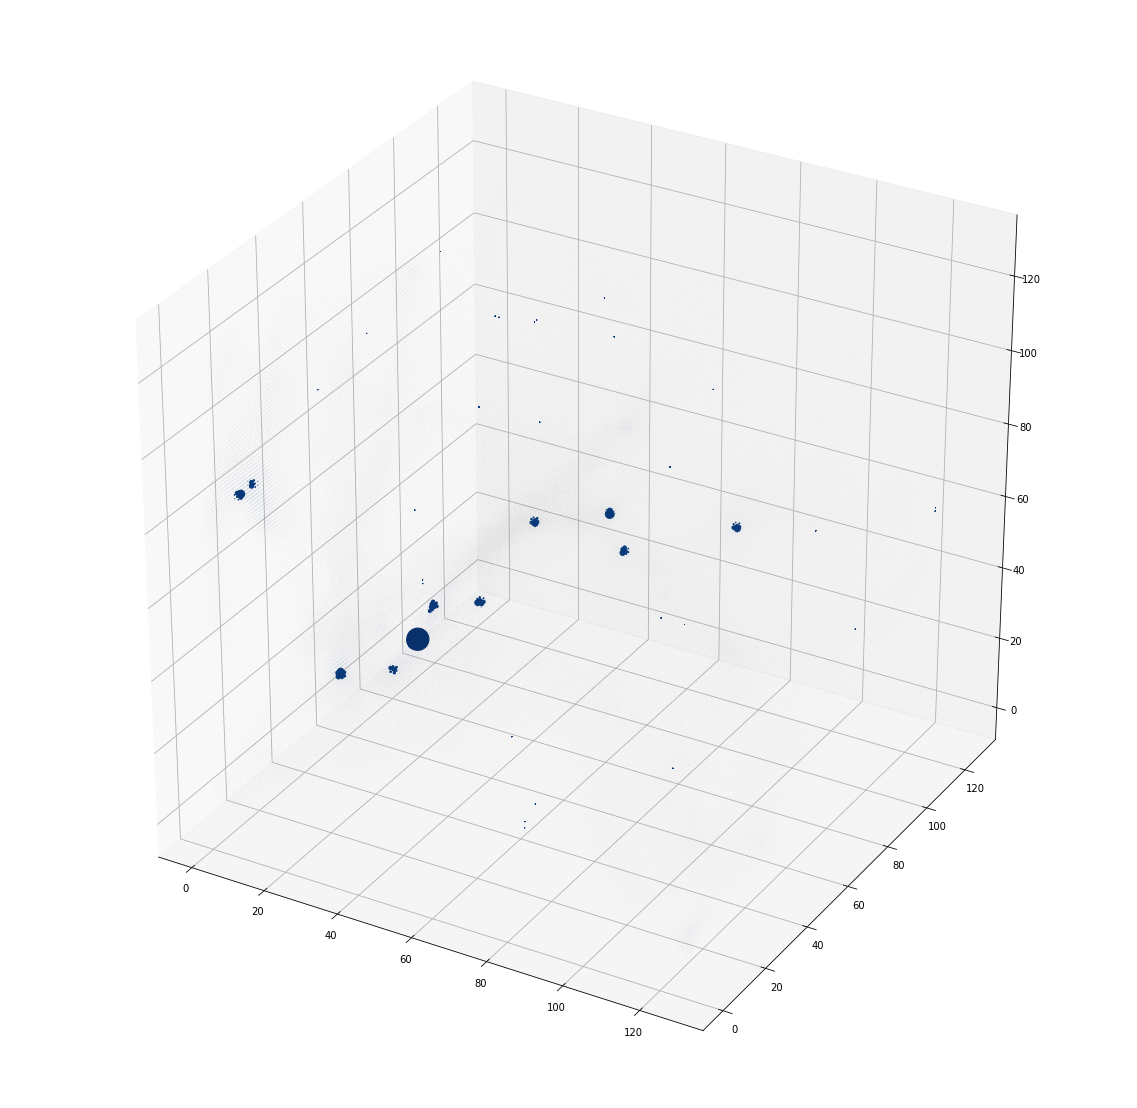

[4.49466614e-08 3.58961834e-08 5.21989384e-08 1.59445376e-09
 2.25971134e-09]


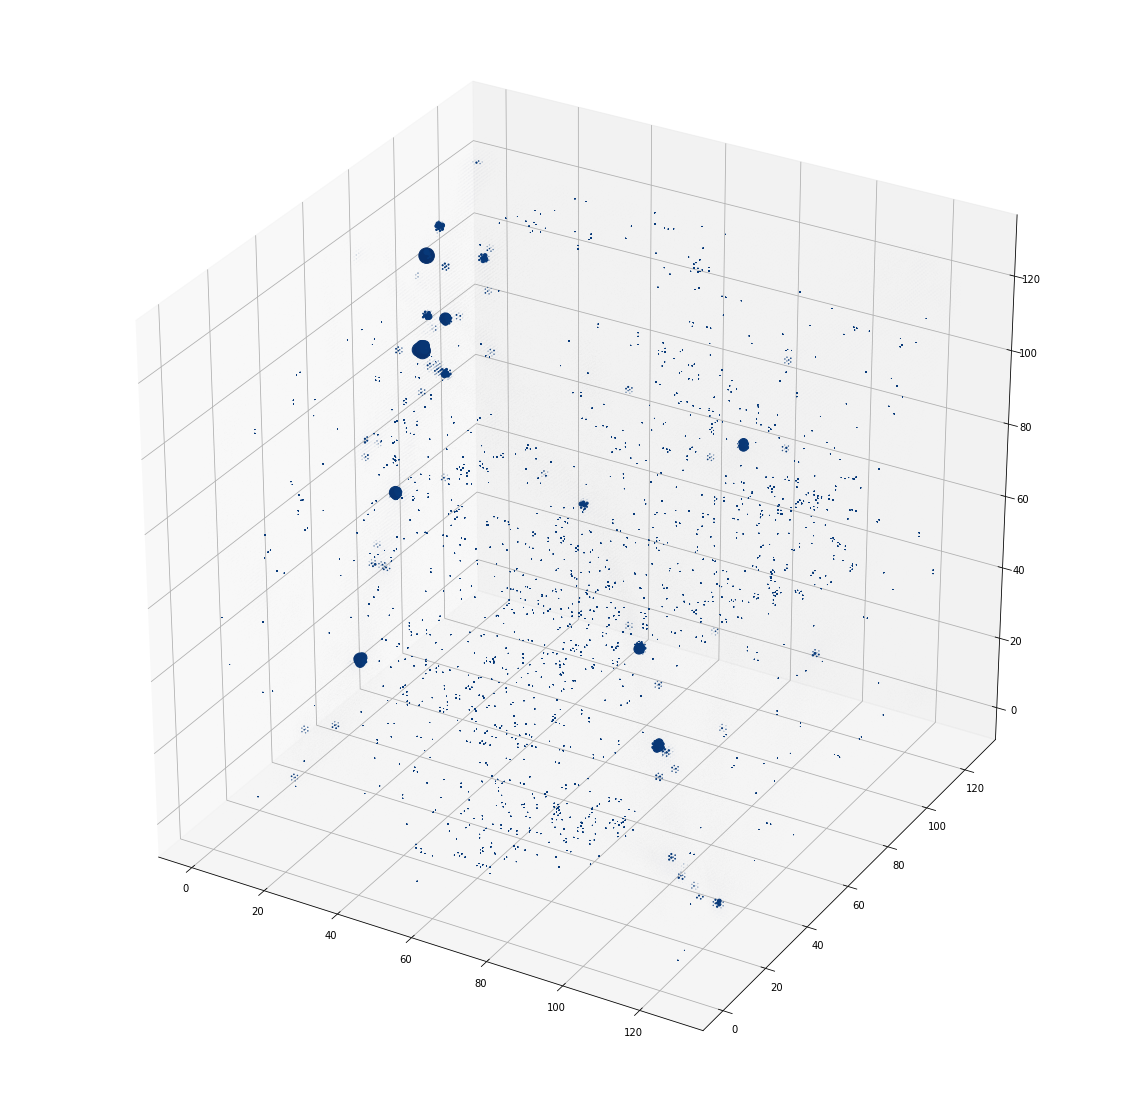

[3.84212896e-09 5.99727920e-08 4.81709708e-08 1.30131803e-10
 5.08980724e-10]


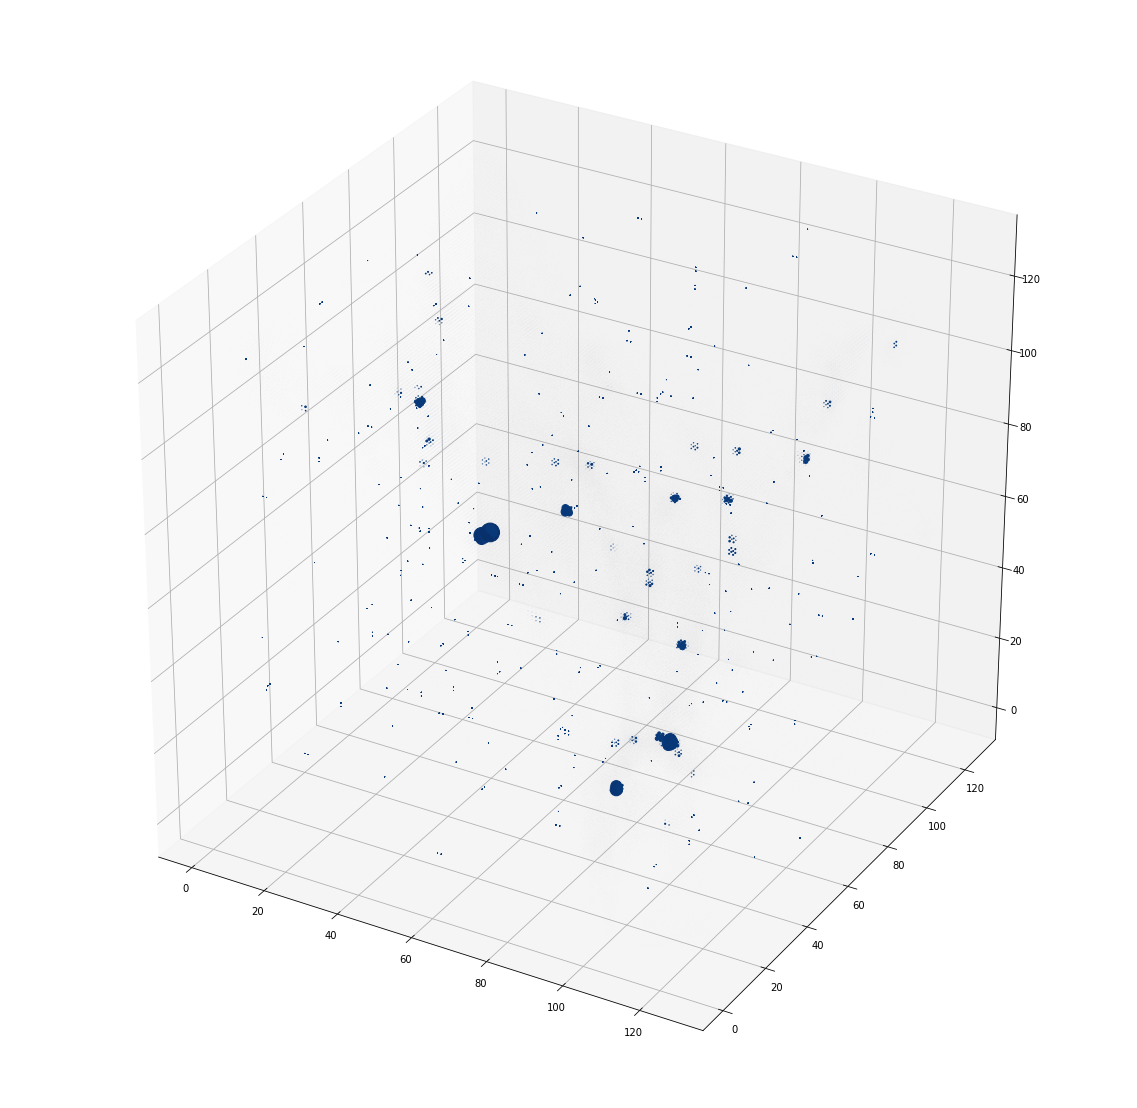

[1.20042967e-07 4.15595025e-08 3.80233503e-08 1.32356795e-08
 4.98397619e-08]


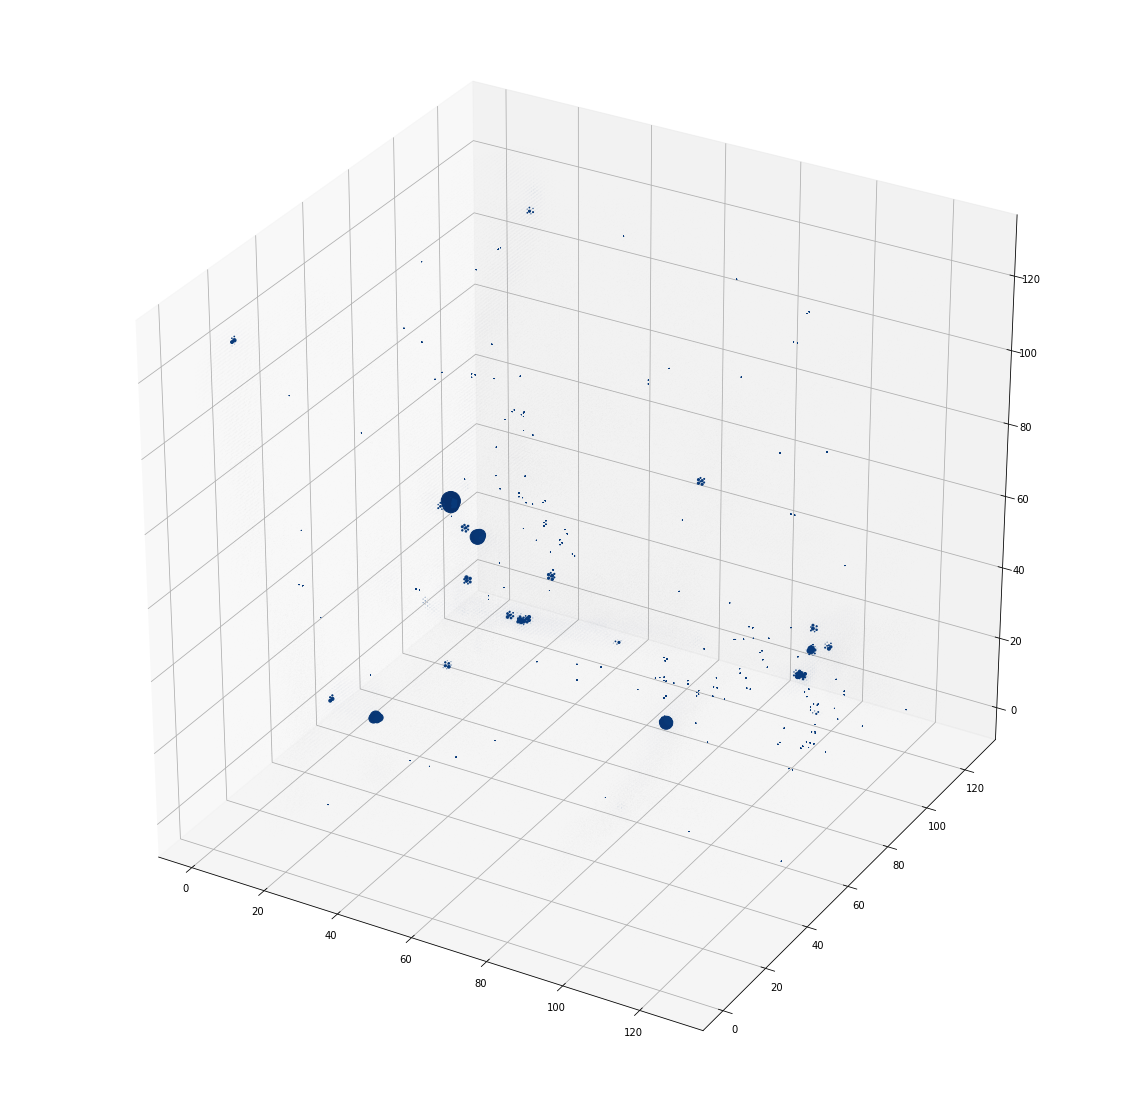

[2.54020752e-07 1.25989838e-07 1.55014924e-06 1.26006386e-06
 1.02633604e-07]


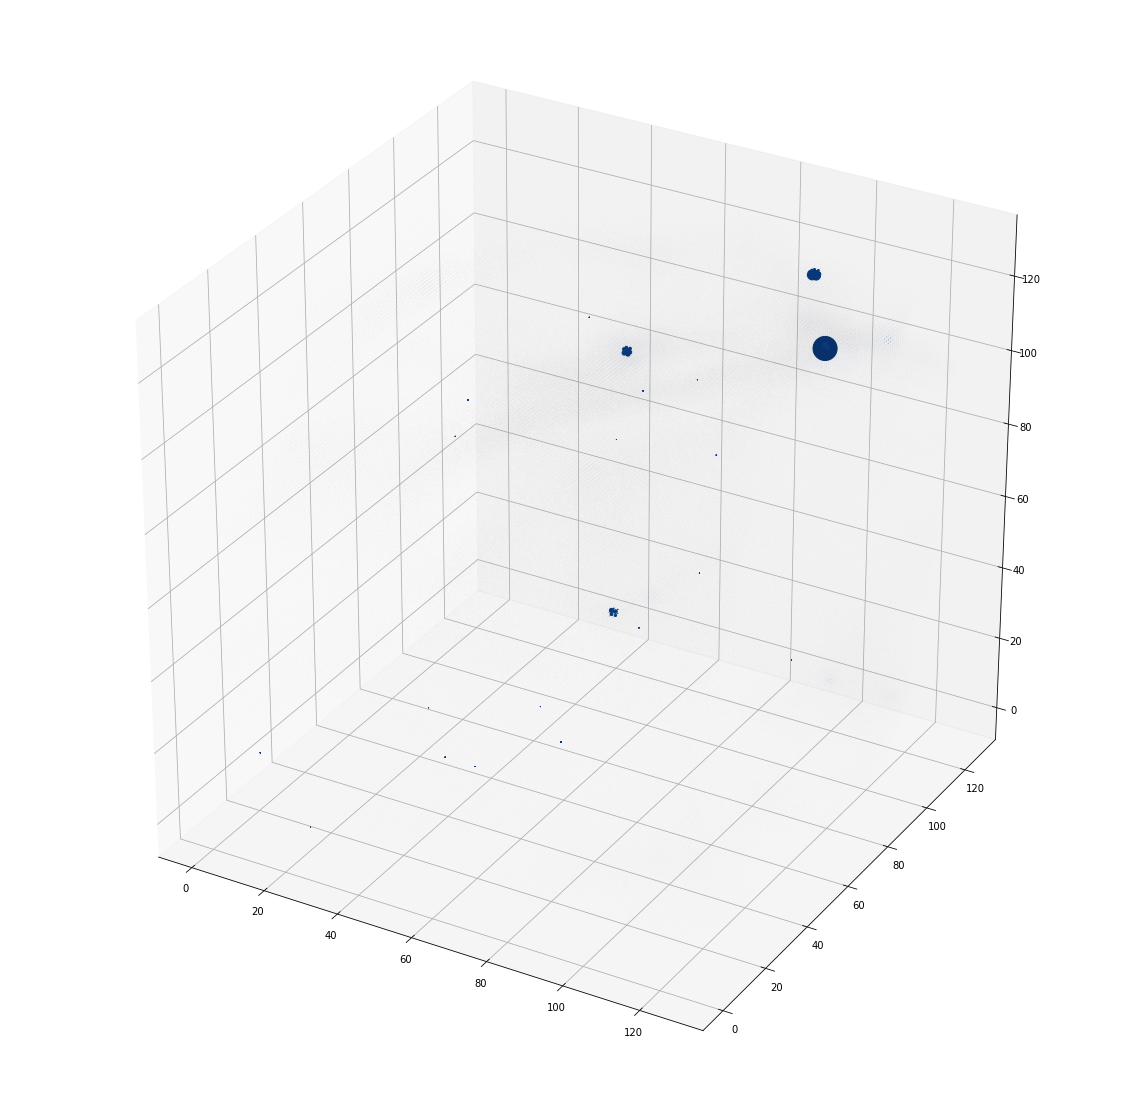

[1.45487352e-08 8.06298887e-10 2.21061149e-09 7.88096180e-09
 9.21028195e-09]


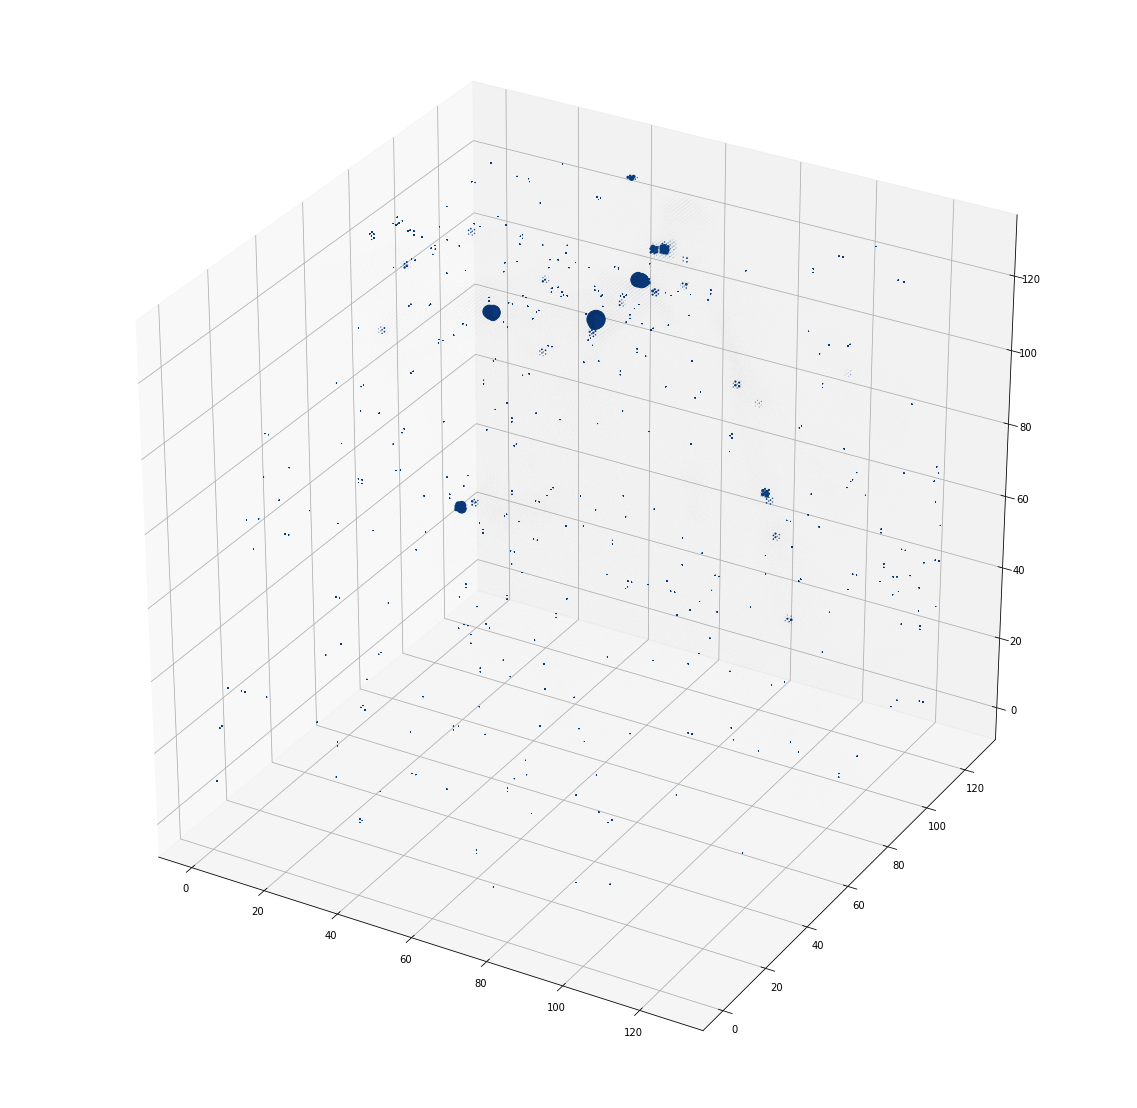

[1.58993337e-07 6.34698872e-08 1.33648603e-08 2.89123391e-08
 1.78959379e-08]


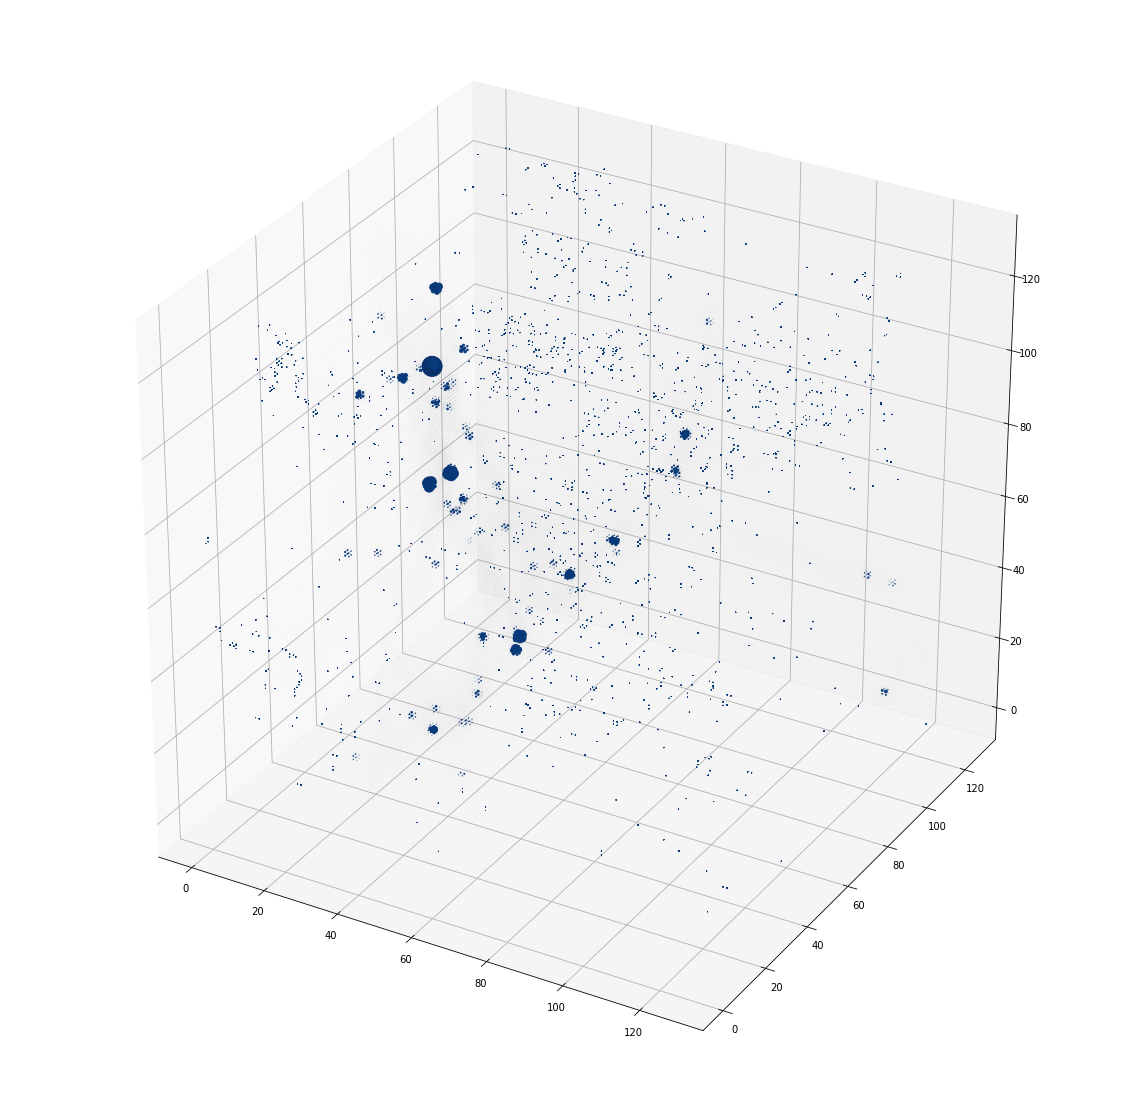

[8.76507061e-07 2.54078039e-07 2.63972776e-06 2.19259599e-06
 6.54703570e-06]


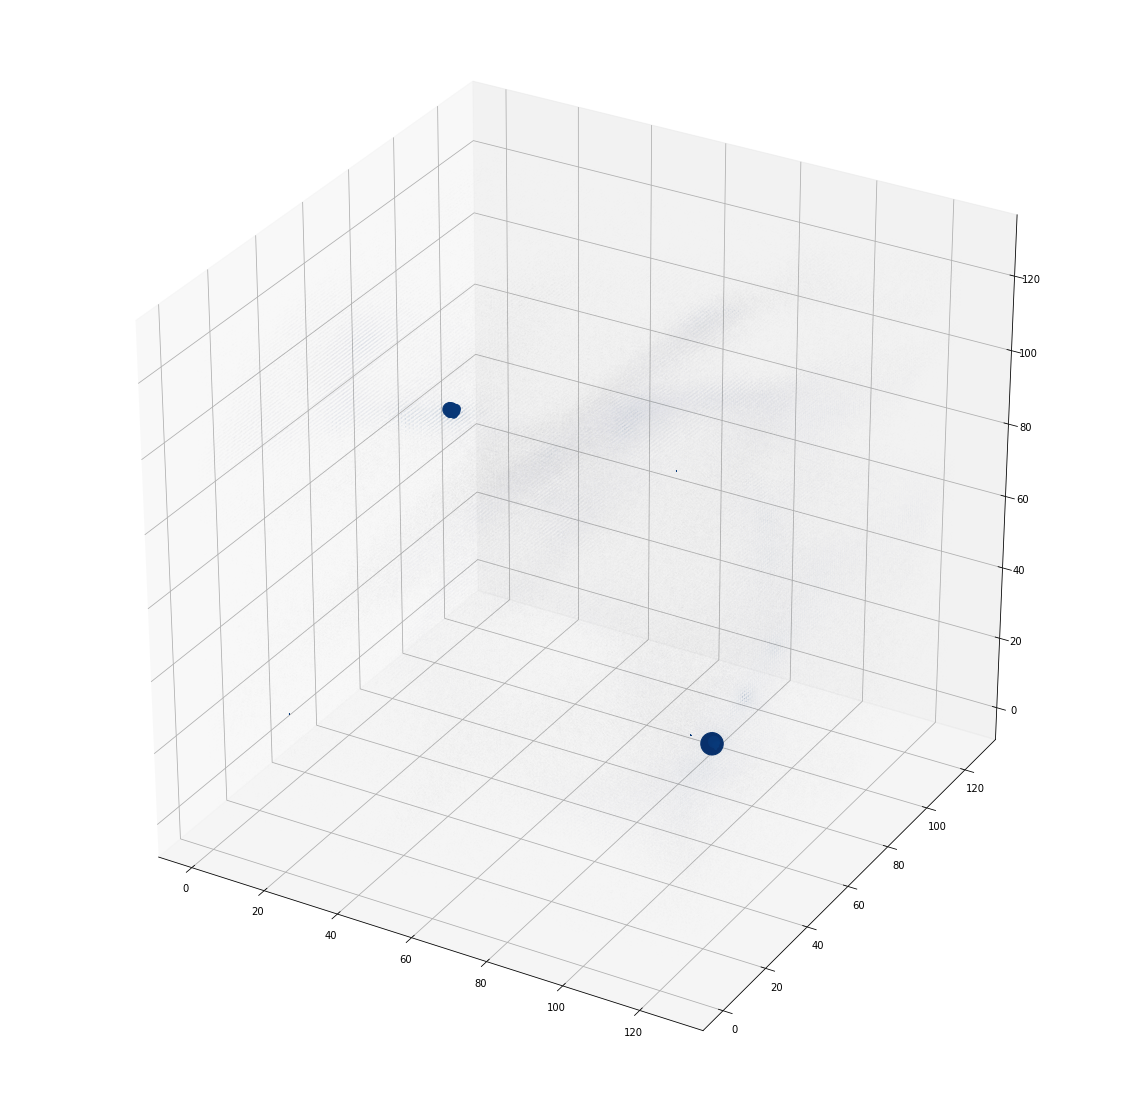

[1.47257539e-08 2.69341294e-08 1.14616051e-09 3.82102827e-09
 6.27663479e-09]


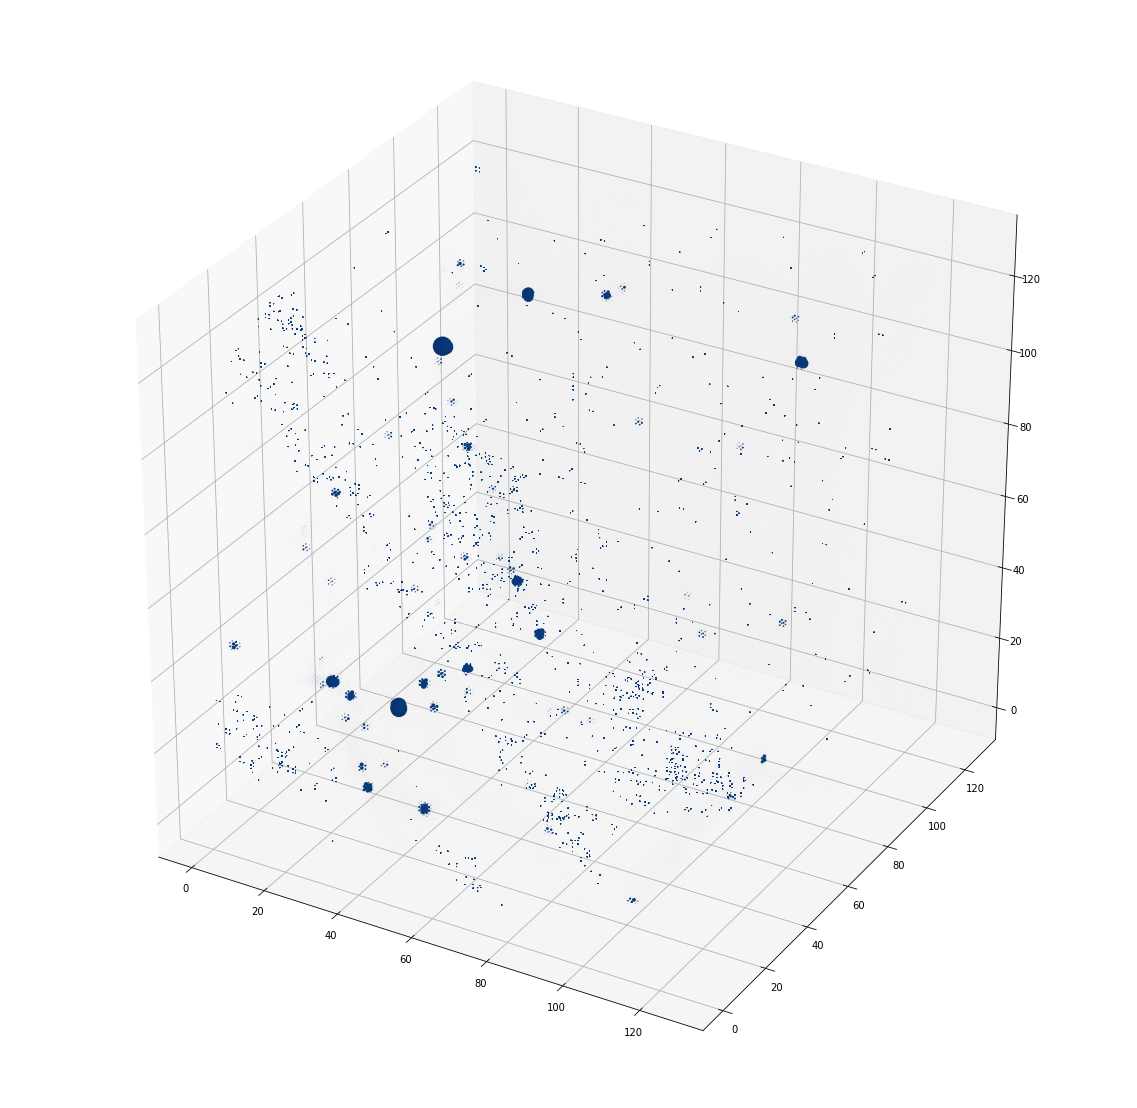

In [202]:
for i in [*range(16)]:
    
    cube_size = 128
    random_cube_index = 0
    stdev_mask = 1
    edge = np.array([*range(cube_size)])

    fig = plt.figure(figsize=(20,20)) 
    ax = fig.add_subplot(111, projection='3d') 

    start = random_cube_index
    end = random_cube_index+cube_size

    data_value = f[i][start:end,
                      start:end,
                      start:end]

    x,y,z = edge,edge,edge

    product = [*itertools.product(x,y,z)]

    X = np.array([product[k][0] for k in [*range(len(product))]])
    Y = np.array([product[k][1] for k in [*range(len(product))]])
    Z = np.array([product[k][2] for k in [*range(len(product))]])

    data_1dim = np.array([data_value[X[i]][Y[i]][Z[i]] for i in [*range(len(product))]])
    initial_mean = np.mean(data_1dim) - 2*np.std(data_1dim)
    mask = data_1dim > 0
    mask = mask.astype(np.int)

    data_1dim = np.multiply(mask,data_1dim)
    X = X[np.where(data_1dim>0)]
    Y = Y[np.where(data_1dim>0)]
    Z = Z[np.where(data_1dim>0)]
    data_1dim = data_1dim[np.where(data_1dim>0)]
    s = 600*data_1dim/np.linalg.norm(data_1dim)

    cmap=plt.get_cmap("Blues")
    new_cmap = truncate_colormap(cmap, 0.96, 1,n=1000)

    print (s[:5])
    ax.scatter(X, Y, Z, 
               c=data_1dim, 
               cmap=new_cmap,
               s=s,alpha=1)
    plt.show()